In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
car_price= pd.read_csv("CarPrice.csv")

In [3]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_price.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
X = car_price[['enginesize','horsepower']] 
y = car_price['price']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [8]:
X_train

,enginesize,horsepower
66,134,72
111,120,95
153,92,62
96,97,69
38,110,86
...,...,...
106,181,160
14,164,121
92,97,69
179,171,161


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr= LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test)

In [13]:
y_pred

array([27620.03619798, 17195.4636208 , 11999.62017375, 12924.34425193,
       20931.433593  ,  7587.57766203,  8288.31446385,  7765.88352827,
       10419.7634379 ,  6530.15186176, 14665.90948051,  7765.88352827,
       15752.34205143, 11920.82128257, 39238.76974191,  6571.64529553,
        2101.58924253, 19165.04957015, 11672.01521192, 10419.7634379 ,
       11423.20914127, 22503.06890808,  7587.57766203,  6322.83922488,
        6712.64570437, 27620.03619798, 16200.16207221, 15495.23729402,
        7587.57766203, 15495.23729402, 20931.433593  ,  6712.64570437,
        6571.64529553, 20454.60680158,  9756.33209348, 20931.433593  ,
       11477.18923816,  6443.20881581,  6837.04873969, 19165.04957015,
        9673.34522594])

In [21]:
import statsmodels.api as sm


In [25]:
# Add a constant to X_test
X_test_const = sm.add_constant(X_test)

In [28]:
X_train_const = sm.add_constant(X_train)

In [30]:
model = sm.OLS(y_train, X_train_const).fit()

In [31]:
y_pred = model.predict(X_test_const)

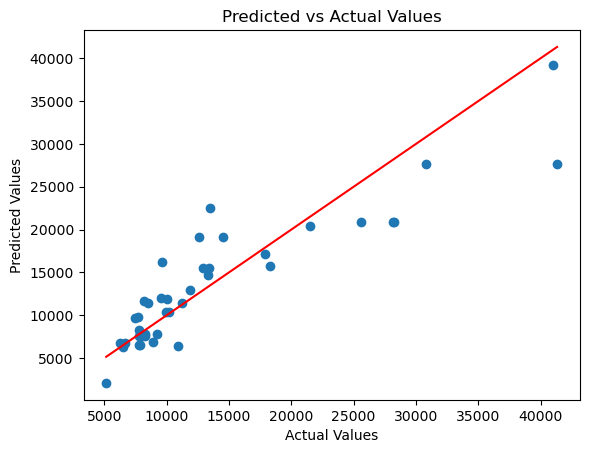

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  

In [41]:
import seaborn as sns

In [34]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [39]:
numerical_columns = [ 'wheelbase', 'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

correlation_matrix = car_price[numerical_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  wheelbase  enginesize  boreratio    stroke  \
wheelbase          1.000000    0.569329   0.488750  0.160959   
enginesize         0.569329    1.000000   0.583774  0.203129   
boreratio          0.488750    0.583774   1.000000 -0.055909   
stroke             0.160959    0.203129  -0.055909  1.000000   
compressionratio   0.249786    0.028971   0.005197  0.186110   
horsepower         0.353294    0.809769   0.573677  0.080940   
peakrpm           -0.360469   -0.244660  -0.254976 -0.067964   
citympg           -0.470414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.544082   -0.677470  -0.587012 -0.043931   
price              0.577816    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.58453

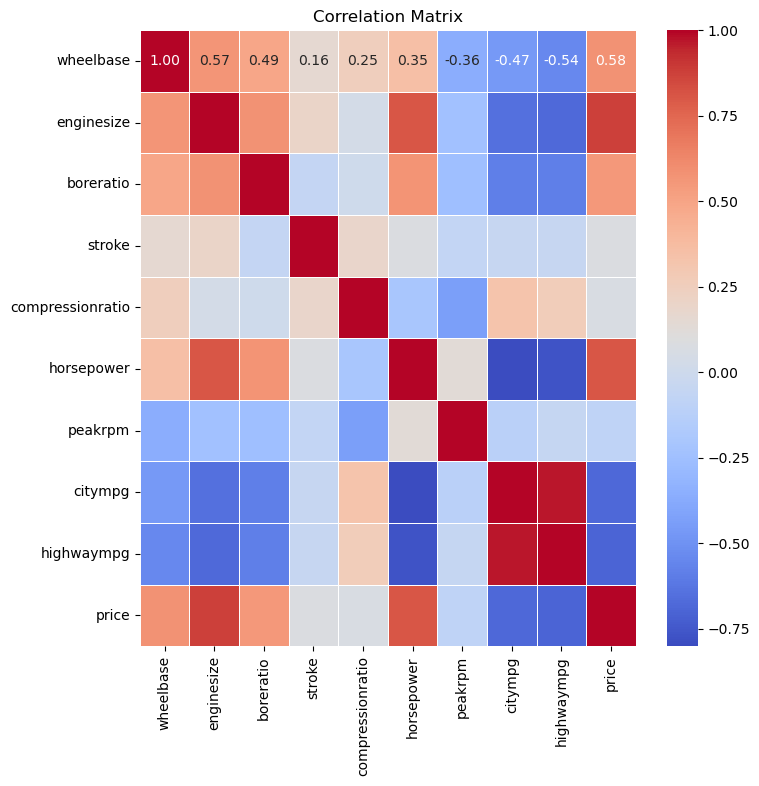

In [42]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()